In [43]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.offline as pyo
from scipy import signal
import scipy.cluster.hierarchy as spc
from pandas import read_excel
from ipywidgets import widgets
from ipywidgets import interactive, HBox, VBox
import plotly.io as pio
from sklearn.cluster import KMeans
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from plotly.graph_objs import *
from plotly.subplots import make_subplots
import plotly.express as px
import json

In [44]:
country_list = ["FR","BE","BG","CY","CZ","DE","DK","EE","ES",
                "FI","AT","GB","GR","HR","HU","IE","IT","LT",
                "LU","LV","MT","NL","PL","PT","RO","SE","SI","SK"]

country_list_iso = ["FRA","BEL","BGR","CYP","CZE","DEU","DNK",
                    "EST","ESP","FIN","AUT","GBR","GRC","HRV",
                    "HUN","IRL","ITA","LTU","LUX","LVA","MLT",
                    "NLD","POL","PRT","ROU","SWE","SVN","SVK"]


df_unemp = pd.read_csv('data_nico/Unemp_total.csv', index_col=None)
df_unemp = df_unemp[['LOCATION', 'TIME', 'Value']].pivot_table(values='Value', index='TIME', columns ='LOCATION')

df_gdp = pd.read_csv('data_vinc/PIB28.csv')

In [45]:
def change_config(fig):
    """
    This function return fig with the layout modified to make it prettier 
    """
    # params 
    # title and labels
    size_title = 18
    size_axes_labels = 12
    family = 'Andale Mono, monospace' # font 
    color = '#F2F2F2'
    
    
    # plot config
    width = 1300
    height = 650
    
    # configuration of the axes (ticks for each label on the axes)
    ticks = 'outside'
    tickwidth = 2 
    tickcolor = '#F2F2F2'
    ticklen = 10
    
    # grid color 
    grid_color_x = 'rgba(153, 163, 164,0.5)'
    grid_color_y = 'rgba(153, 163, 164,0.5)'
    
    
    # font for title and labels 
    font_title = dict(size=size_title, family=family, color=color)
    font_axes_labels =  dict(size=size_axes_labels, family=family, color=color)
    
    
    # remove background and configure size
    layout = Layout(
        paper_bgcolor='rgba(0,0,0,0)',
        plot_bgcolor='rgba(0,0,0,0)',
        font = font_axes_labels,
        titlefont = font_title,
        height=height,
        #width=width,
    )
    
    fig.update_layout(layout)
    
    # update the axes configuration
    fig.update_xaxes(
        ticks = ticks,
        tickwidth = tickwidth, 
        tickcolor = tickcolor,
        ticklen = ticklen,
        title_font = font_axes_labels,
        gridcolor = grid_color_x
    )
    
    fig.update_yaxes(
        ticks = ticks,
        tickwidth = tickwidth, 
        tickcolor = tickcolor,
        ticklen = ticklen,
        title_font = font_axes_labels, 
        gridcolor = grid_color_y,
        #gridwidth=None
    )
    
    return fig

In [46]:
#select column name
column = "Value"
df_gdp = df_gdp[["LOCATION","TIME",column]].pivot_table(values=column, index='TIME', columns ='LOCATION')#values=column, index='TIME', columns='LOCATION')
df_gdp

LOCATION,AUT,BEL,BGR,CYP,CZE,DEU,DNK,ESP,EST,FIN,...,LVA,MLT,NLD,OECD,POL,PRT,ROU,SVK,SVN,SWE
TIME,,,,,,,,,,,,,,,,,,,,,
2004,33753.472389,32033.983077,9117.098653,25921.013055,20779.142527,31712.774026,32917.958893,26158.034977,14481.432753,31173.153761,...,12199.780284,21341.856268,35776.668812,29091.663707,13341.874444,21458.183025,8982.019325,15183.955756,22737.262303,33608.849355
2005,35024.557484,33177.947339,10183.806414,27763.105975,21907.305595,32236.740986,34152.881663,27600.937175,16574.460822,32051.762889,...,13837.089238,22265.719116,37625.252435,30478.990308,13897.543071,22725.351606,9602.103407,16595.261602,23848.605399,34029.085227
2006,37626.245494,35222.474358,11251.243922,29984.329856,23712.242435,34630.816470,37297.523836,30713.803154,19257.646402,34419.156888,...,15742.904798,23227.410451,40971.493263,32508.887051,15145.861194,24657.083629,11544.715086,18831.799020,25681.207419,37435.395276
2007,39393.953567,36755.650522,12607.887169,32850.086448,26064.506576,36822.840138,38978.780753,32431.570501,22133.611223,37801.926033,...,18121.545421,24892.495898,43895.900712,34066.083002,16789.980110,25708.159839,13686.942348,21115.656398,27533.363591,40592.764986
2008,41316.022642,37883.233422,14089.659789,34830.225272,27724.418767,38432.448211,41282.995471,33242.245427,22807.728472,40083.701943,...,19462.435513,26193.230358,46419.042594,34929.958400,18315.131090,26665.771577,16782.151849,23608.977522,29594.660350,41971.781211
2009,40935.528801,37757.239173,13914.467312,33891.829308,27474.197993,37472.754357,40340.373142,32095.778361,20579.678682,37979.854491,...,16921.577956,26141.314851,44567.119952,33982.940292,19080.704660,26464.441285,16635.328127,22951.723337,27516.532192,40156.476371
2010,42017.796539,39836.849331,14587.638194,33420.855508,27554.742856,39673.860480,43004.912769,31689.975609,21766.793095,38953.010667,...,17589.444565,27811.504613,45041.369847,35286.421485,20789.191989,27259.769598,16966.414345,24974.227631,27821.436958,42179.452526
2011,44469.209642,41108.701911,15661.177049,33313.512960,28795.816027,42541.513126,44407.942070,31872.363088,24738.851279,40916.647325,...,19797.965061,28585.575738,46599.227659,36689.581710,22576.179383,26769.427690,17907.570971,26051.137711,28931.421879,44503.736723
2012,46477.655075,42440.262340,16241.600465,31834.648622,29051.390424,43359.541048,44808.549212,31724.631513,26141.083529,40872.854802,...,21298.207498,29434.899196,47271.968226,37668.444646,23542.002955,26438.140472,18929.530639,26940.079741,29048.331295,45304.291021


In [47]:
def plotMapSlider(data,title,zMax,zMin,colorbarTitle,vWidth,vHeight):
    """
    Plot data over multiple timestamps
    """
    data_slider = []
    for ix in range(0,10):
        data_one_year = dict(
                            type='choropleth',
                            locations=country_list_iso, # Spatial coordinates
                            z = list(data[country_list_iso].iloc[ix].values),
                            locationmode = 'ISO-3', # set of locations match entries in `locations`
                            autocolorscale=False,
                            colorscale = "Magma",
                            reversescale=True,
                            zmax = zMax,
                            zmin = zMin,
                            colorbar_title = "GDP (€)",
                            )
        ix = ix+1
        data_slider.append(data_one_year) 
    steps = []

    for i in range(len(data_slider)):
        step = dict(method='restyle',args=['visible', [False] * len(data_slider)],label=str(int(2004+i)))
        step['args'][1][i] = True
        steps.append(step)

    #create 'sliders' object from the 'steps' 
    sliders = [dict(active=0, pad={"t": 1}, steps=steps)] 

    layout = dict(geo=dict(scope='europe', bgcolor='rgba(0,0,0,0)'),sliders=sliders,title={
        'text': "Evolution of the GDP over the years",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},autosize=True,dragmode = False, height=1000, paper_bgcolor='rgba(0,0,0,0)',
        plot_bgcolor='rgba(0,0,0,0)')
    fig = dict(data=data_slider, layout=layout,) 
    #UNCOMMENT TO SAVE
    #pio.write_html(fig, '../DataStoryMeatConsumption/graphs/economy/map_gdp.html')
    pio.show(fig)

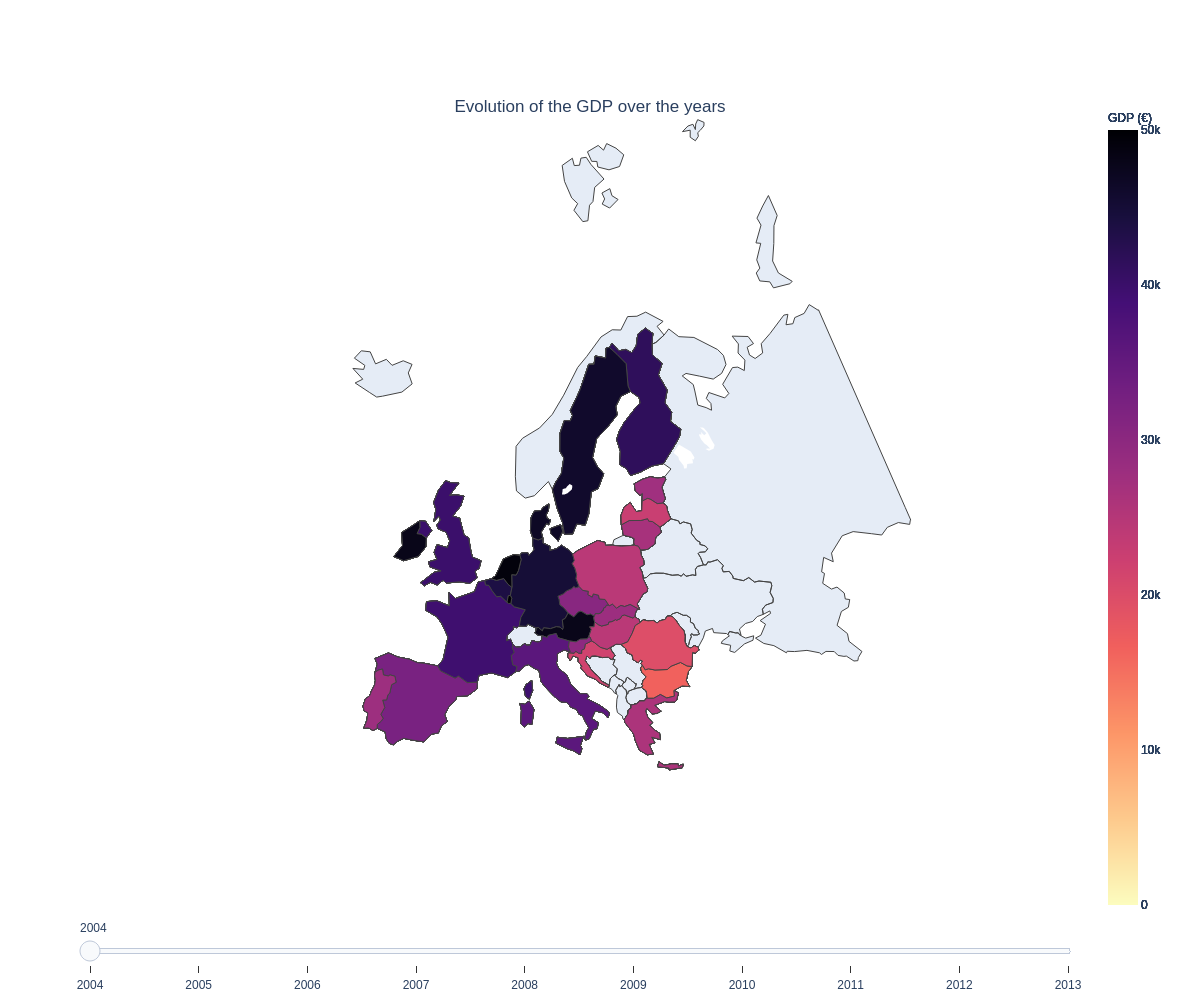

In [48]:
#plot map with the value of gdp per country
plotMapSlider(df_gdp, 'GDP over the years', 50000, 0, 'oij', 1300, 900)

# PIB / CONSO VIANDE

In [49]:
df_meat = pd.read_csv('data_vinc/meat_consumption_per_habita_2004_2013.csv',  index_col=0)

#some countries are not available in this dataset so we puse the data only for 
country_list2 = ['AUT', 'BEL', 'BGR', 'HRV', 'DNK', 'EST',
        'FIN', 'FRA', 'DEU', 'GRC', 'HUN', 'IRL', 'ITA', 
        'LVA', 'LTU', 'LUX', 'MLT', 'NLD', 'POL','POR', 
        'ROU', 'SVK', 'SVN', 'ESP', 'SWE','GBR']
#select column name
column = "consumption per habita"
df_meat = df_meat[["Area","years",column]].pivot_table(values=column, index='years', columns ='Area')#values=column, index='TIME', columns='LOCATION')
df_meat.columns = country_list2

In [50]:
df_meat

,AUT,BEL,BGR,HRV,DNK,EST,FIN,FRA,DEU,GRC,...,MLT,NLD,POL,POR,ROU,SVK,SVN,ESP,SWE,GBR
years,,,,,,,,,,,,,,,,,,,,,
2004,96.161250,80.508475,50.483225,50.165768,73.550663,61.482159,72.225930,90.701505,84.403962,81.350090,...,100.033261,78.853332,77.715442,86.507751,55.991452,62.175684,90.160802,108.772674,77.765782,86.246459
2005,95.471982,83.573843,50.464501,50.337972,94.430190,66.232476,72.756980,87.665260,83.926409,84.595027,...,96.853984,77.029100,77.251866,87.472958,65.848690,66.074970,91.610391,108.277056,78.012365,85.357677
2006,92.315543,80.293914,47.710355,58.434959,80.700748,70.333901,71.923556,82.793456,84.342177,85.417924,...,98.765676,81.240537,77.600328,90.087622,65.154959,62.349616,87.353334,107.248423,77.919908,87.099448
2007,94.531150,83.801516,46.747034,63.521060,91.792232,74.464600,76.180297,83.400025,87.857720,80.554490,...,108.476983,74.703546,79.631786,97.032182,65.545056,60.299487,85.058673,110.439587,79.554434,86.044177
2008,90.274554,69.373704,51.343429,63.080260,79.623200,70.231015,75.653469,90.958527,87.328982,80.644162,...,100.531591,89.726559,76.792622,95.704307,67.262857,61.383198,89.540256,101.513197,80.475430,82.229407
2009,93.101346,67.701533,55.576990,67.752627,67.677278,75.613518,74.347851,90.131774,87.948693,82.651742,...,99.774655,89.774301,78.718527,96.563348,71.525404,61.310928,88.074861,97.363122,79.404975,81.412141
2010,94.352692,69.926812,52.817618,61.587131,78.052475,76.502486,76.054480,90.010872,89.667453,83.188772,...,96.612057,81.206690,78.557986,96.373199,63.464899,59.364687,86.469016,95.984610,81.578626,82.674511
2011,93.729508,67.177922,56.449406,61.074297,75.890709,79.719628,75.717042,88.705963,91.994640,81.180273,...,98.797799,77.150307,79.815635,93.258869,58.963143,61.753052,82.919185,95.420391,82.841506,83.620887
2012,89.556275,72.680396,56.228662,69.223832,111.100837,63.385845,79.610951,88.959381,90.180373,78.294084,...,95.797828,91.570122,77.265029,91.535152,58.618642,51.625347,79.299595,95.838759,80.882814,83.675764


In [51]:
def intersection(lst1, lst2): 
    lst3 = [value for value in lst1 if value in lst2] 
    return lst3 

#countries both regroups the countries that are present in the GDP dataset and the meat consumption dataset
countries_both = intersection(df_meat.columns, df_gdp.columns)
print("data meat and GDP available for:")
print(countries_both)

data meat and GDP available for:
['AUT', 'BEL', 'BGR', 'HRV', 'DNK', 'EST', 'FIN', 'FRA', 'DEU', 'GRC', 'HUN', 'IRL', 'ITA', 'LVA', 'LTU', 'LUX', 'MLT', 'NLD', 'POL', 'ROU', 'SVK', 'SVN', 'ESP', 'SWE', 'GBR']


In [52]:
#Sort the columns by their name to have the same order on each dataset
df_meat = df_meat[countries_both].reindex(sorted(df_meat[countries_both].columns), axis=1)
df_gdp = df_gdp[countries_both].reindex(sorted(df_gdp[countries_both].columns), axis=1)

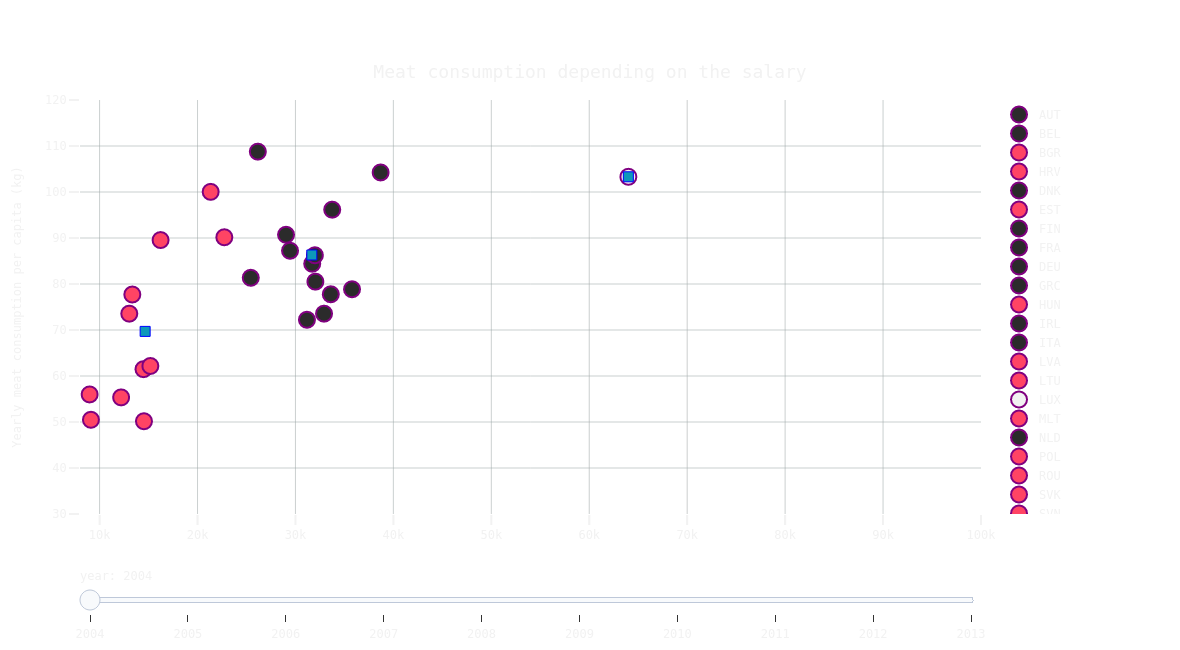

In [53]:
def plot_kmeans_slider():
    degree = 2

    colors_kmeans = ['#FF4464', '#2B2B2B', '#F2F2F2']
    color_centroid = '#0d98ba'
    color=[f'rgb({np.random.randint(0,256)}, {np.random.randint(0,256)}, {np.random.randint(0,256)})' for _ in range(25)]

    k_means_groups = []

    # Create figure
    fig = go.Figure()
    fig_lin = go.Figure()

    for i in range(10):
        visible = (i==0)
        #regression on data of one year
        model = make_pipeline(PolynomialFeatures(degree), linear_model.LinearRegression())
        y=df_meat[countries_both].iloc[i].to_numpy()[:, np.newaxis]
        x=df_gdp[countries_both].iloc[i].to_numpy()[:, np.newaxis]
        model.fit(x, y)
        t = np.linspace(0, 100000, 1000)
        t = t[:, np.newaxis]
        yt = model.predict(t)
        #fig.add_trace(go.Scatter(x = t[:,0],y = yt[:,0], name='Interpolation', marker_color = 'red', opacity=0.,line=dict(color='firebrick', width=3, dash='dot'), visible=visible))

        #kmean
        data_kmean = []
        for c in countries_both:
            data_kmean.append([df_gdp[c].iloc[i], df_meat[c].iloc[i]])
        data_kmean = np.array(data_kmean)
        k_means = KMeans(n_clusters=3, random_state=39847).fit(data_kmean)#81982 #123 #39847
        groups = k_means.predict(data_kmean)
        k_means_groups.append(groups)

        #one scatter per country
        for j, c in enumerate(countries_both):
            fig.add_trace(go.Scatter(y=[df_meat[c].iloc[i]], x=[df_gdp[c].iloc[i]], mode='markers', 
                marker=dict(
                    size=16,
                    color=colors_kmeans[groups[j]],#[str(i) for i in range(df_gdp.iloc[0].size)]
                    line=dict(
                    width=2,
                    color='purple')),
                text=c, name=c, visible=visible))

        fig.add_trace(go.Scatter(x = k_means.cluster_centers_[:,0],y = k_means.cluster_centers_[:,1],
                                 mode = 'markers', name='K means centroïds',
                                 marker_color = color_centroid,
                                 opacity=1, visible=visible,
                                 marker=dict(size=10, symbol = 'square', line=dict(width=1, color='blue'))))


    fig.update_xaxes(range=[8000, 100000])
    fig.update_yaxes(range=[30, 120])

    # Make 10th trace visible
    fig.data[0].visible = True

    # Create and add slider
    n = 26
    steps = []
    for i in range(0, len(fig.data), n):
        step = dict(
            method="restyle",
            args=["visible", [False] * len(fig.data)],
            label=str(int(2004+i/n))
        )
        for j in range(n):
            step["args"][1][i+j] = True  # Toggle i'th trace to "visible"
        steps.append(step)





    sliders = [dict(
        active=10,
        currentvalue={"prefix": "year: "},
        pad={"t": 50},
        steps=steps,
        name = "date"
    )]

    fig.update_layout(
        #visible=[False for i in range(270)],
        autosize=True,
        sliders=sliders,
        title={
            'text': "Meat consumption depending on the salary",
            'y':0.9,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'},
        yaxis_title="Yearly meat consumption per capita (kg)",

    )
    
    fig = change_config(fig)
    return fig, k_means_groups
    
fig_kmeans, k_means_groups = plot_kmeans_slider()
fig_kmeans.show()

In [54]:
#pio.write_html(fig_kmeans, file='../DataStoryMeatConsumption/graphs/economy/meat_salary.html', auto_open=False)

### mean of the consumption of k means groups

In [27]:
#kmeans mean
means_g1 = []
means_g2 = []
g1s = []
g2s = []

#index 0 5 and -1 correspond to the data of years 2004, 2009, 2013:
for y in [0, 5, -1]:
    group1 = []
    group2 = []
    for i in range(len(k_means_groups[y])):
        if k_means_groups[y][i] == 0:
            group1.append(countries_both[i])
        if k_means_groups[y][i] == 1:
            group2.append(countries_both[i])
    
    g1s.append(group1)
    g2s.append(group2)
    means_g1.append(df_meat.iloc[y][group1].mean())
    means_g2.append(df_meat.iloc[y][group2].mean())
            
print("means 2004, 2009, 2013 group poor:", means_g1)
print("means 2004, 2009, 2013 group rich:", means_g2)

means 2004, 2009, 2013 group poor: [69.69659388234909, 74.36410866835517, 70.83483632171522]
means 2004, 2009, 2013 group rich: [86.30860136498633, 83.65911007544607, 86.97072761654944]


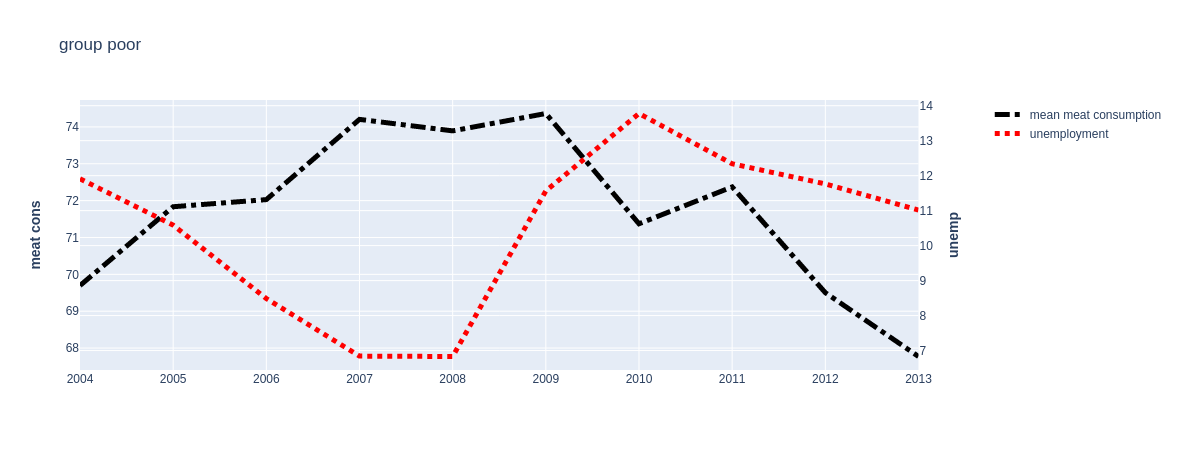

In [28]:

fkmg = make_subplots(rows=1, cols=1,
                    specs=[[{"secondary_y": True}]])
    
fkmg.add_trace(go.Scatter(y = df_meat[g1s[0]].mean(axis=1), x=[2004+i for i in range(10)], mode='lines', name='mean meat consumption', line=dict(color='black', width=5, dash='dashdot')))

fkmg.add_trace(go.Scatter(y = df_unemp[['EST', 'HUN', 'LVA', 'LTU', 'POL', 'SVK', 'SVN']].mean(axis=1)[6:16], x=[2004+i for i in range(10)], mode='lines', name='unemployment', line=dict(color='red', width=5, dash='dot')), secondary_y=True)

fkmg.update_yaxes(title_text="<b>meat cons", secondary_y=False)
fkmg.update_yaxes(title_text="<b>unemp", secondary_y=True)
fkmg.update_layout(title="group poor")

fkmg.show()
    

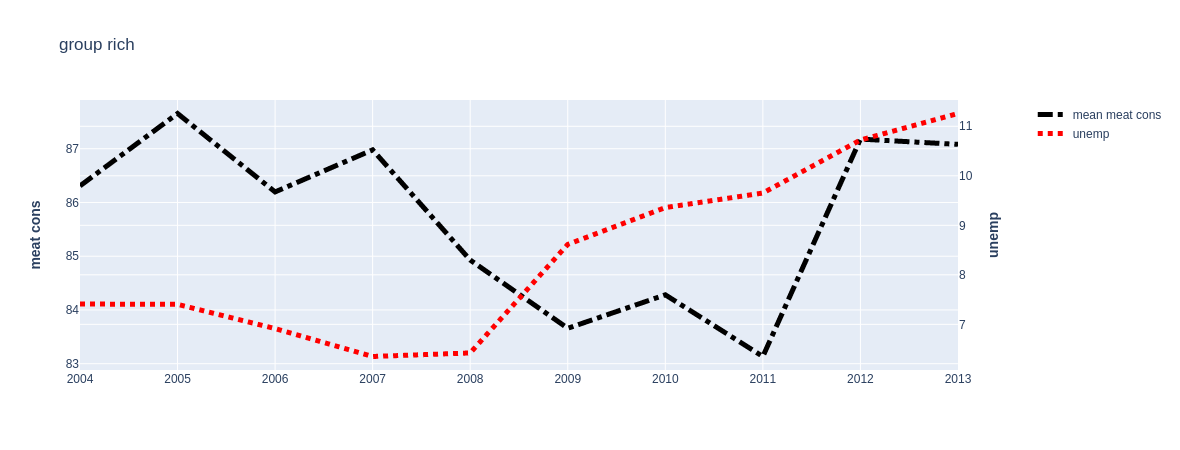

In [29]:
fkmg2 = go.Figure()

fkmg2 = make_subplots(rows=1, cols=1,
                    specs=[[{"secondary_y": True}]])
#for i in range(len(g2s[0])):
#    fkmg2.add_trace(go.Scatter(y=df_meat[g2s[0][i]], x=[2004+i for i in range(10)], mode='lines', name=g2s[0][i]))
    
fkmg2.add_trace(go.Scatter(y = df_meat[g2s[0]].mean(axis=1), x=[2004+i for i in range(10)], mode='lines', name='mean meat cons', line=dict(color='black', width=5, dash='dashdot')))
  
fkmg2.add_trace(go.Scatter(y = df_unemp[g2s[0]].mean(axis=1)[6:16], x=[2004+i for i in range(10)], mode='lines', name='unemp', line=dict(color='red', width=5, dash='dot')), secondary_y=True)
    
fkmg2.update_yaxes(title_text="<b>meat cons", secondary_y=False)
fkmg2.update_yaxes(title_text="<b>unemp", secondary_y=True)
fkmg2.update_layout(title="group rich")
    
fkmg2.show()
    

### interpolation of the meat consumption over the GDP

In [55]:
#this is the same list as countries both but without the Luxembourg because we can consider this country as an outlier
#due to the big GDP
countries_both_nLUX = ['AUT', 'BEL', 'BGR', 'HRV', 'DNK', 'EST', 'FIN', 'FRA', 'DEU', 'GRC', 'HUN', 'IRL', 'ITA', 'LVA', 'LTU', 'MLT', 'NLD', 'POL', 'ROU', 'SVK', 'SVN', 'ESP', 'SWE', 'GBR']

In [56]:
#model 1 to 4 makes an interpolation of degrees 1 to 4
model1 = make_pipeline(PolynomialFeatures(1), linear_model.LinearRegression())
model2 = make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression())
model3 = make_pipeline(PolynomialFeatures(3), linear_model.LinearRegression())
model4 = make_pipeline(PolynomialFeatures(4), linear_model.LinearRegression())

#mix the data over all year so it becomes intemporal:
y=df_meat[countries_both_nLUX].iloc[0].to_numpy()#[:, np.newaxis]
x=df_gdp[countries_both_nLUX].iloc[0].to_numpy()#[:, np.newaxis]
for i in range(1, 10):
    y = np.concatenate((y, df_meat[countries_both_nLUX].iloc[i].to_numpy()))
    x = np.concatenate((x, df_gdp[countries_both_nLUX].iloc[i].to_numpy()))
y_=y[:, np.newaxis]
x_=x[:, np.newaxis]

#do the regression
model1.fit(x_, y_)
model2.fit(x_, y_)
model3.fit(x_, y_)
model4.fit(x_, y_)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=4, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [57]:
#make the prediction to plot nice curves
t = np.linspace(0, 100000, 1000)
t = t[:, np.newaxis]
yt1 = model1.predict(t)
yt2 = model2.predict(t)
yt3 = model3.predict(t)
yt4 = model4.predict(t)

In [58]:
#score the best 2 models
y_m1 = model1.predict(x_)[:, 0]
y_m3 = model3.predict(x_)[:, 0]
m1_r2 = r2_score(y_[:,0], y_m1)
m3_r2 = r2_score(y_[:,0], y_m3)
print('score model 1: ', m1_r2)
print('score model 3: ', m3_r2)

score model 1:  0.3048196519052214
score model 3:  0.38452621899976946


In [59]:
#print weights of linear model
linreg1 = model1.named_steps['linearregression']
print("model 1 weights:", linreg1.intercept_[0], ', ', linreg1.coef_[0, 1])

model 1 weights: 57.791595655305045 ,  0.00072967206970031


In [60]:
#print the weights of model of degree 3 
linreg3 = model3.named_steps['linearregression']
print("model 3 weights:", linreg3.intercept_[0], ', ', linreg3.coef_[0, 1],', ', linreg3.coef_[0, 2],', ', linreg3.coef_[0, 3])

model 3 weights: 14.656306382156302 ,  0.004741033969645882 ,  -1.0439383894426761e-07 ,  7.605990490211489e-13


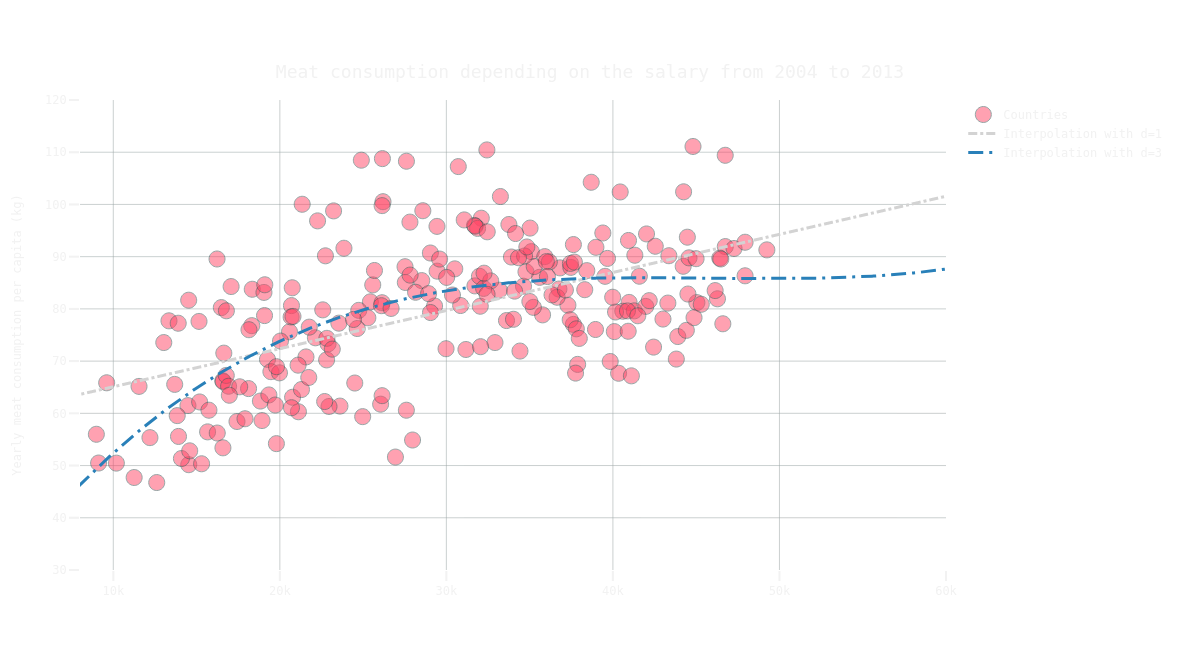

In [62]:
#print the result
#2 and 4 are commentend because they do not represent well the data in our opinion

countries_both_nLUX_all = []
for i in range(10):
    countries_both_nLUX_all+=countries_both_nLUX
fig3 = go.Figure()
fig3.add_trace(go.Scatter(y=y, x=x, mode='markers', 
            marker=dict(
                opacity=0.5,
                size=16,
                color='#FF4464',
                line=dict(
                width=1,
                color='DarkSlateGrey')), name='Countries', text=countries_both_nLUX_all),)

#fig3.add_trace(go.Scatter(x = t[:,0],y = yt2[:,0], name='Interpolation with d=2', marker_color = 'red', opacity=1,line=dict(color='firebrick', width=3, dash='dash')))
fig3.add_trace(go.Scatter(x = t[:,0],y = yt1[:,0], name='Interpolation with d=1', marker_color = 'red', opacity=1,line=dict(color='LightGrey', width=3, dash='dashdot'), visible=True))
fig3.add_trace(go.Scatter(x = t[:,0],y = yt3[:,0], name='Interpolation with d=3', marker_color = 'red', opacity=1,line=dict(color='#2980b9 ', width=3, dash='longdashdot')))
#fig3.add_trace(go.Scatter(x = t[:,0],y = yt4[:,0], name='Interpolation with d=4', marker_color = 'red', opacity=1,line=dict(color='dodgerblue', width=3, dash='solid')))
fig3.update_xaxes(range=[8000, 60000])
fig3.update_yaxes(range=[30, 120])
fig3.update_layout(title={
        'text': "Meat consumption depending on the salary from 2004 to 2013",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        yaxis_title="Yearly meat consumption per capita (kg)",)

change_config(fig3).show()

In [63]:
pio.write_html(fig3, file='../DataStoryMeatConsumption/graphs/economy/interpolation.html', auto_open=False)

### map

In [38]:
def plotMapSlider(title,zMax,zMin,colorbarTitle,vWidth,vHeight):
    """
    Plot map with temporal data
    """
    data_slider = []
    for ix in range(0,10):
        visible = (ix==0)
        data_one_year = dict(
                            type='choropleth',
                            locations=countries_both, # Spatial coordinates
                            z = list(k_means_groups[ix]),
                            locationmode = 'ISO-3', # set of locations match entries in `locations`
                            autocolorscale=False,
                            colorscale = "YlGnBu",
                            zmax = zMax,
                            zmin = zMin,
                            visible=visible
                            )
        ix = ix+1
        data_slider.append(data_one_year) 
    steps = []

    for i in range(len(data_slider)):
        step = dict(method='restyle',args=['visible', [False] * len(data_slider)],label=(str(int(2004+i))))
        step['args'][1][i] = True
        steps.append(step)

    #create 'sliders' object from the 'steps' 
    sliders = [dict(active=0, pad={"t": 1}, steps=steps)] 

    layout = dict(geo=dict(scope='europe', bgcolor='rgba(0,0,0,0)'),sliders=sliders,autosize=False, width=vWidth,height=vHeight,dragmode = False,title={
        'text': "Evolution of the 3 clusters over the years",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},paper_bgcolor='rgba(0,0,0,0)',
        plot_bgcolor='rgba(0,0,0,0)')
    fig = dict(data=data_slider, layout=layout,) 
    pio.show(fig)
    #l = pio.from_json(json.dumps(fig))
    pio.write_html(fig, '../DataStoryMeatConsumption/graphs/economy/map_groups.html')

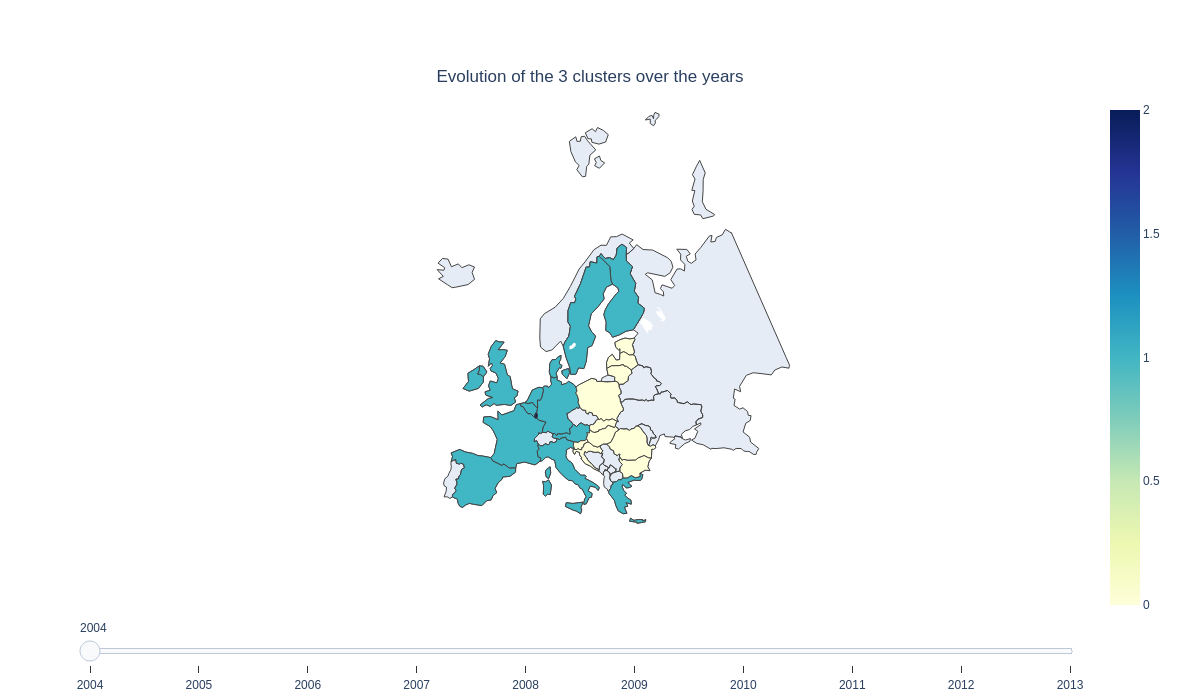

In [39]:
#plot map with the value of the group assigned with the k means over the years
plotMapSlider("Eurobarometer",2,0," population thinks about it's one of the most important threat",700,700)